!pip install opencv-python numpy

In [2]:
import os

folder_path = "../../../../Benchmark/images"

if os.path.exists(folder_path) and os.path.isdir(folder_path):
    print("The folder exists.")
else:
    print("The folder does not exist.")


The folder exists.


In [3]:
import cv2
import numpy as np
import os

In [4]:
def get_vector(image, bins=32):
    red = cv2.calcHist(
        [image], [2], None, [bins], [0, 256]
    )
    green = cv2.calcHist(
        [image], [1], None, [bins], [0, 256]
    )
    blue = cv2.calcHist(
        [image], [0], None, [bins], [0, 256]
    )
    vector = np.concatenate([red, green, blue], axis=0)
    vector = vector.reshape(-1)
    return vector


In [5]:
folder_path

'../../../../Benchmark/images'

In [6]:
def get_images_in_folder(folder_path):
    images_list = []
    # Iterate over each file in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is a JPEG image
        if filename.endswith(".jpg"):
            # Create a full path to the image
            img_path = os.path.join(folder_path, filename)
            images_list.append(img_path)
    return images_list



In [7]:
list_of_images = get_images_in_folder(folder_path)
print("Length of the list:", len(list_of_images))
print("=========")

print("==========")

Length of the list: 15000


In [8]:
list_of_images[0]

'../../../../Benchmark/images/36eb1baf881ed8b2074934553bfb5.jpg'

In [9]:
vectors_list = []

for filename in list_of_images:
    # Read the image using OpenCV
    image = cv2.imread(filename)

    # Convert it to RGB (since OpenCV loads images in BGR format by default)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Compute the vector using your function
    vector = get_vector(image_rgb)

    # Append to the list
    vectors_list.append(vector)

print("Length of the list:", len(vectors_list))


Length of the list: 15000


In [10]:
vectors_list[0]

array([15699., 10109.,  9057.,  8892.,  8530.,  8354.,  6594.,  5934.,
        6264.,  8245.,  9004., 11503.,  9501.,  9645.,  9374.,  6857.,
        4884.,  4380.,  3889.,  3286.,   938.,   743.,   593.,   601.,
         549.,   686.,   838.,   639.,   371.,   204.,   124.,   213.,
        1813.,   849.,  1007.,  6599., 10715.,  8883.,  6981.,  9751.,
        9852.,  7821.,  7262.,  7715.,  7552.,  8035.,  8613.,  9377.,
        9266.,  8905.,  8056.,  5766.,  4255.,  4335.,  4531.,  2901.,
         901.,   774.,   716.,   785.,   932.,   751.,   322.,   479.,
        1107.,   561.,   669.,   928.,  1015.,  1338.,  2388.,  5332.,
       12426., 11856., 10123.,  7626.,  7002.,  5478.,  5394.,  6124.,
        6000.,  6569.,  6973.,  8116.,  8313.,  9146.,  7365.,  6213.,
        5783.,  5490.,  7216.,  4785.,  1423.,  1337.,  1193.,  1211.],
      dtype=float32)

In [13]:
pip install Pillow


Note: you may need to restart the kernel to use updated packages.


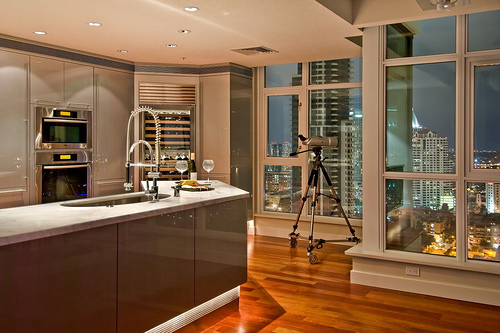

In [14]:
from IPython.display import display
from PIL import Image

image = Image.open(list_of_images[0])
display(image)


In [15]:
def cosine(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

def search(idx,image_vectors, top_k=5):
    query_vector = image_vectors[idx]
    distances = []
    for _, vector in enumerate(image_vectors):
        distances.append(cosine(query_vector, vector))
    # get top k most similar images
    top_idx = np.argpartition(distances, -top_k)[-top_k:]
    return top_idx

In [20]:
relevants=search(0,vectors_list,15)

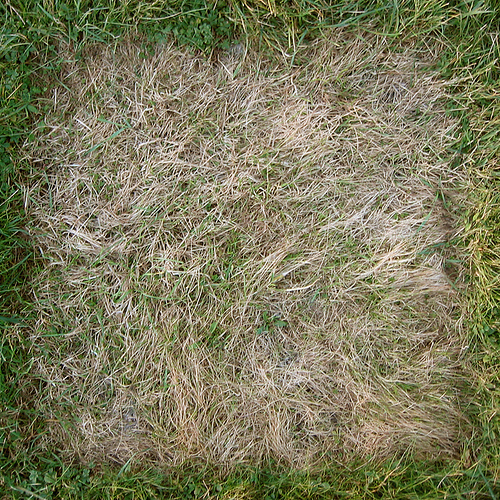

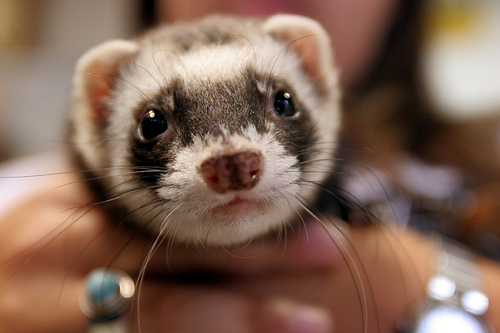

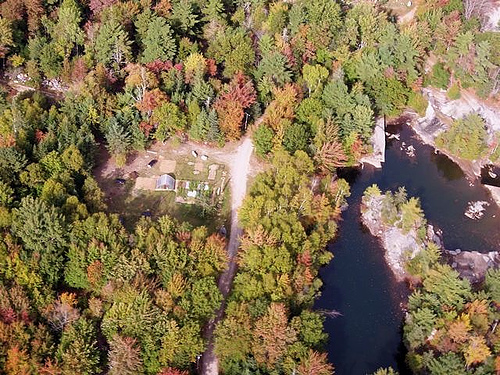

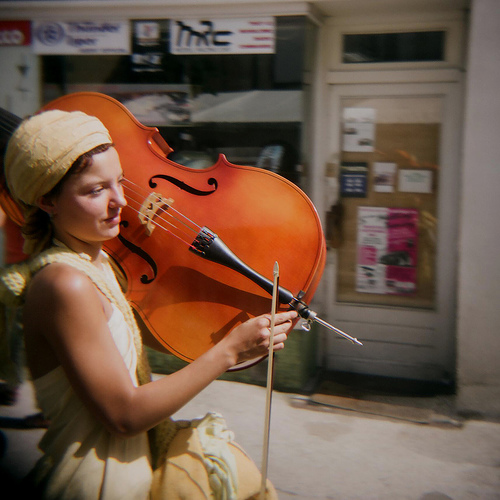

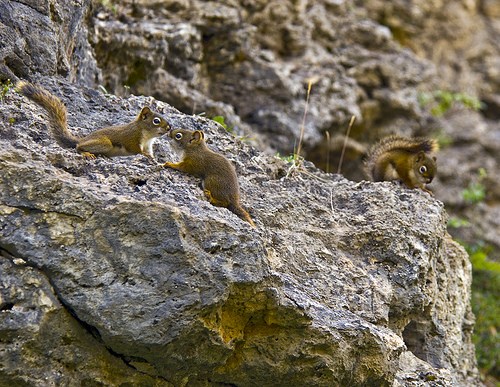

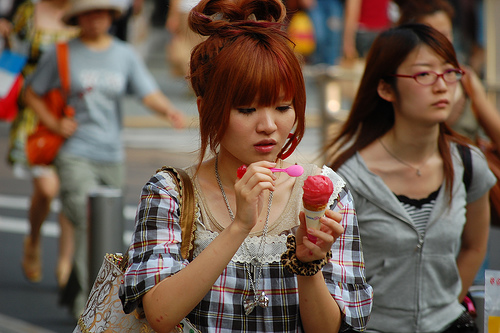

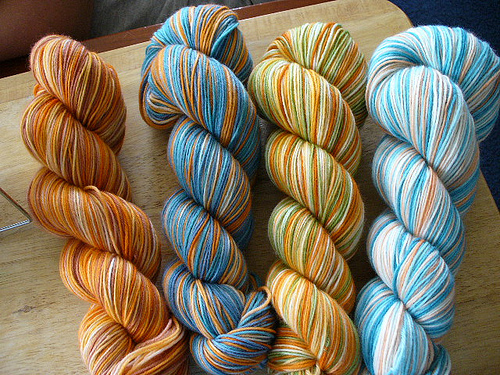

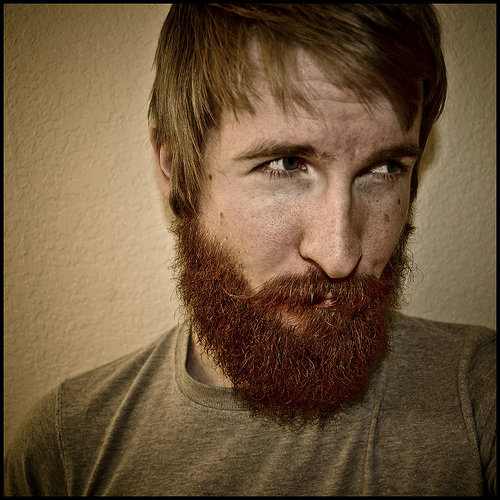

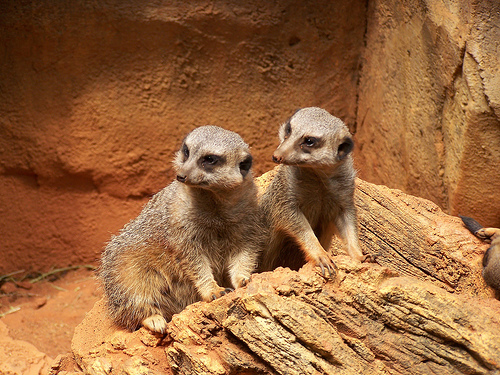

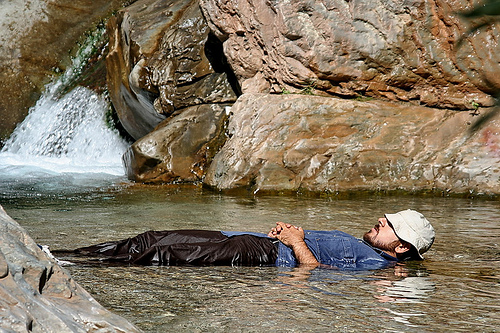

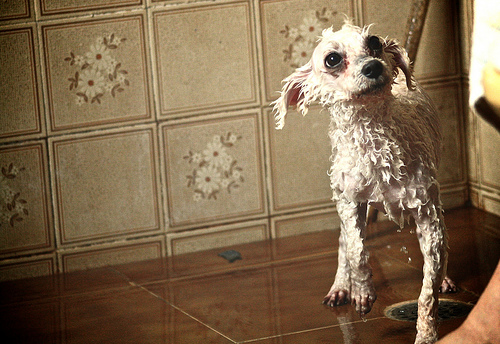

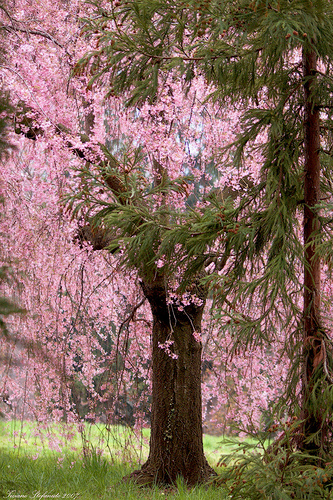

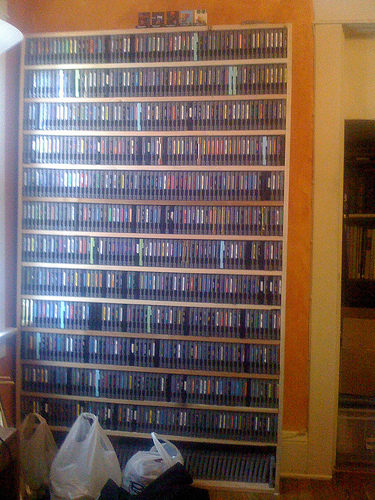

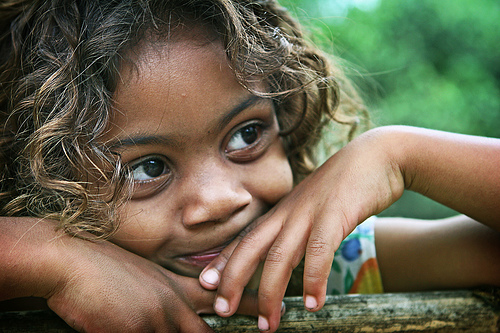

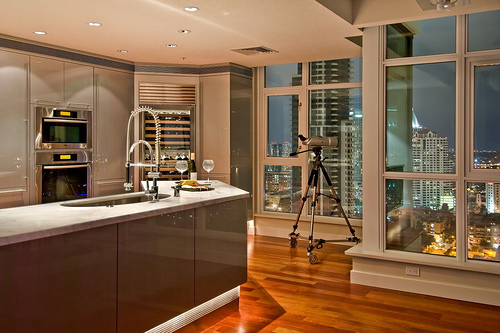

In [21]:
for i in relevants:
    image = Image.open(list_of_images[i])
    display(image)